<a href="https://colab.research.google.com/github/cybercat17/MLDL/blob/master/Studying_Titanic_Kernels_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Workflow Goals

- Classifying : Classify & Categorize each sample
- Correlating : Determine the correlation between each feature with our solution goal
- Converting : Numerical or Categorical?
- Completing : Filling the missing values
- Correcting : Detecting & Handling possibly inaccurate values
- Creating : Creating new features that might help the training process using existing features
- Charting : Selecting the right visualization Plots

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cybercat","key":"0bdbeb40485d70cbb45bd530ae54e5dd"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 19.0MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 23.6MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.48MB/s]


## Acquiring & Describing the Data

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combined = [train_df, test_df]

train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [219]:
train_df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,C.A. 31921,26.2500,NaN,S


In [220]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Taussig, Mrs. Emil (Tillie Mandelbaum)",male,1601,B96 B98,S
freq,1,577,7,4,644


## Analyzing Data

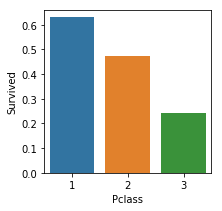

In [221]:
byPclass = train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
plt.figure(figsize=(3,3))
sns.barplot(x=byPclass.Pclass, y=byPclass.Survived)

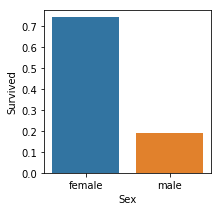

In [222]:
byGender = train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
plt.figure(figsize=(3,3))
sns.barplot(x=byGender.Sex, y=byGender.Survived)

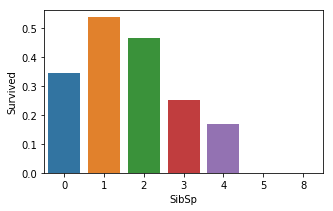

In [223]:
bySibsp = train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()
plt.figure(figsize=(5,3))
sns.barplot(x=bySibsp.SibSp, y=bySibsp.Survived)

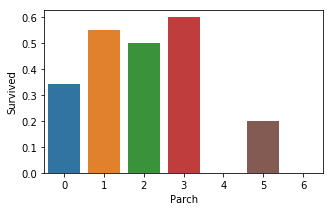

In [224]:
byParch = train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()
plt.figure(figsize=(5,3))
sns.barplot(x=byParch.Parch, y=byParch.Survived)

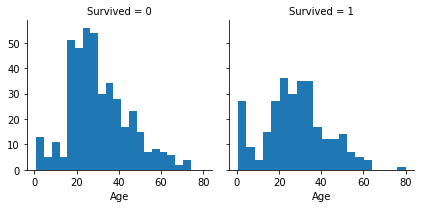

In [225]:
grid = sns.FacetGrid(train_df, col='Survived')
grid.map(plt.hist, 'Age', bins=20)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


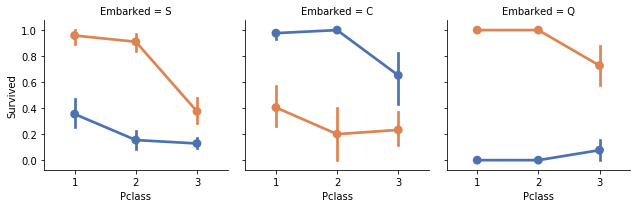

In [226]:
grid = sns.FacetGrid(train_df, col='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


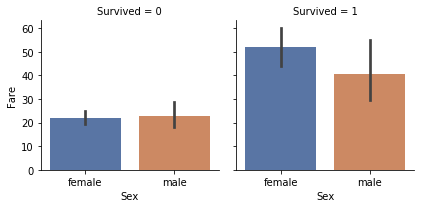

In [227]:
grid = sns.FacetGrid(train_df, col='Survived')
grid.map(sns.barplot, 'Sex', 'Fare', palette='deep')

## Dropping Features

In [228]:
drop_cols = ['Ticket', 'Cabin']

train_df.drop(labels=drop_cols, axis=1, inplace=True)
test_df.drop(labels=drop_cols, axis=1, inplace=True)
combine = [train_df, test_df]

print(train_df.shape, test_df.shape)

(891, 10) (418, 9)


## Manipulating Features

In [229]:
for dataset in combine:
  dataset['Title'] = dataset.Name.str.extract('([a-zA-Z]+)\.')

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [230]:
for dataset in combine:
  dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare', inplace=True)
  dataset['Title'].replace('Mlle', 'Miss', inplace=True)
  dataset['Title'].replace('Ms', 'Miss', inplace=True)
  dataset['Title'].replace('Mme', 'Mrs', inplace=True)

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [231]:
title_mapping = {'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Rare':4}
for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_mapping)
  dataset['Title'].fillna(0, inplace=True)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,2


In [232]:
train_df.drop(labels=['Name', 'PassengerId'], axis=1, inplace=True)
test_df.drop(labels=['Name'], axis=1, inplace=True)

print(train_df.shape, test_df.shape)

(891, 9) (418, 9)


In [233]:
for dataset in combine:
  dataset['Sex'] = dataset['Sex'].map({'female':0, 'male':1}).astype(int)

train_df.sample(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
133,1,2,0,29.0,1,0,26.0000,S,3
261,1,3,1,3.0,4,2,31.3875,S,0
540,1,1,0,36.0,0,2,71.0000,S,1


In [0]:
guess_ages = np.zeros((2, 3))

In [235]:
for dataset in combine:
  for i in range(0,2):
    for j in range(0,3):
      age_guess = dataset[(dataset.Sex == i) & (dataset.Pclass == j+1)]['Age'].dropna().median()
      guess_ages[i,j] = int(age_guess)
  for i in range(0,2):
    for j in range(0,3):
      dataset.loc[(dataset.Age.isnull()) & (dataset.Sex==i) & (dataset.Pclass==j+1), 'Age'] = guess_ages[i,j]
  dataset['Age'] = dataset['Age'].astype(int)
train_df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
735,0,3,1,28,0,0,16.1000,S,2
602,0,1,1,40,0,0,42.4000,S,2
833,0,3,1,23,0,0,7.8542,S,2
256,1,1,0,35,0,0,79.2000,C,3
656,0,3,1,25,0,0,7.8958,S,2


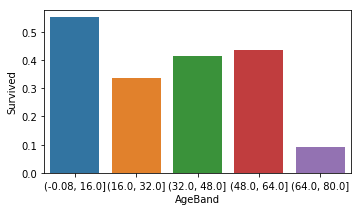

In [236]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
byAgeband = train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()
plt.figure(figsize=(5.5, 3))
sns.barplot(x=byAgeband.AgeBand, y=byAgeband.Survived)

In [237]:
train_df.drop('AgeBand', axis=1, inplace=True)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22,1,0,7.2500,S,2
1,1,1,0,38,1,0,71.2833,C,3
2,1,3,0,26,0,0,7.9250,S,1
3,1,1,0,35,1,0,53.1000,S,3
4,0,3,1,35,0,0,8.0500,S,2


In [238]:
for dataset in combine:
  dataset.loc[dataset.Age <= 16, 'Age'] = 0
  dataset.loc[(dataset.Age > 16) & (dataset.Age <= 32), 'Age'] = 1
  dataset.loc[(dataset.Age > 32) & (dataset.Age <= 48), 'Age'] = 2
  dataset.loc[(dataset.Age > 48) & (dataset.Age <= 64), 'Age'] = 3
  dataset.loc[dataset.Age > 64, 'Age'] = 4

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1,1,0,7.2500,S,2
1,1,1,0,2,1,0,71.2833,C,3
2,1,3,0,1,0,0,7.9250,S,1
3,1,1,0,2,1,0,53.1000,S,3
4,0,3,1,2,0,0,8.0500,S,2


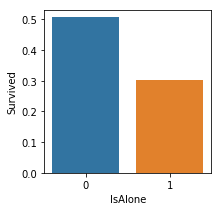

In [239]:
for dataset in combine:
  dataset['IsAlone'] = 0
  dataset.loc[dataset.Parch+dataset.SibSp == 0, 'IsAlone'] = 1
  
byAlone = train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()
plt.figure(figsize=(3,3))
sns.barplot(x=byAlone.IsAlone, y=byAlone.Survived)

In [240]:
drop_cols = ['Parch', 'SibSp']

train_df.drop(drop_cols, axis=1, inplace=True)
test_df.drop(drop_cols, axis=1, inplace=True)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,1,1,7.2500,S,2,0
1,1,1,0,2,71.2833,C,3,0
2,1,3,0,1,7.9250,S,1,1
3,1,1,0,2,53.1000,S,3,0
4,0,3,1,2,8.0500,S,2,1


In [241]:
for dataset in combine:
  dataset['Age*Pclass'] = dataset.Age*dataset.Pclass

train_df.loc[:, ['Age*Pclass', 'Age', 'Pclass']].head()

,Age*Pclass,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


In [242]:
freq_port = train_df.Embarked.dropna().mode()[0]
print('freq port : ' + freq_port)

freq port : S


In [243]:
for dataset in combine:
  dataset['Embarked'].fillna(freq_port, inplace=True)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [244]:
for dataset in combine:
  dataset['Embarked'] = dataset['Embarked'].map({'C':0, 'Q':1, 'S':2}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,1,1,7.2500,2,2,0,3
1,1,1,0,2,71.2833,0,3,0,2
2,1,3,0,1,7.9250,2,1,1,3
3,1,1,0,2,53.1000,2,3,0,2
4,0,3,1,2,8.0500,2,2,1,6


In [245]:
test_df['Fare'].fillna(test_df['Fare'].dropna().mean(), inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int64
Title          418 non-null int64
IsAlone        418 non-null int64
Age*Pclass     418 non-null int64
dtypes: float64(1), int64(8)
memory usage: 29.5 KB


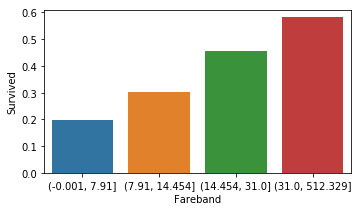

In [246]:
train_df['Fareband'] = pd.qcut(train_df['Fare'], 4)
byFare = train_df[['Fareband', 'Survived']].groupby(['Fareband'], as_index=False).mean()
plt.figure(figsize=(5.5, 3))
sns.barplot(x=byFare.Fareband, y=byFare.Survived)

In [247]:
for dataset in combine:
  dataset.loc[dataset.Fare <= 7.91, 'Fare'] = 0
  dataset.loc[(dataset.Fare > 7.91) & (dataset.Fare <= 14.454), 'Fare'] = 1
  dataset.loc[(dataset.Fare > 14.454) & (dataset.Fare <= 31.0), 'Fare'] = 2
  dataset.loc[(dataset.Fare > 31.0) & (dataset.Fare <= 512.329), 'Fare'] = 3
  dataset['Fare'] = dataset['Fare'].astype(int)

train_df.drop('Fareband', axis=1, inplace=True)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,1,1,0,2,2,0,3
1,1,1,0,2,3,0,3,0,2
2,1,3,0,1,1,2,1,1,3
3,1,1,0,2,3,2,3,0,2
4,0,3,1,2,1,2,2,1,6


In [248]:
y_train = train_df.Survived
train_df.drop('Survived', axis=1, inplace=True)
test_df.drop('PassengerId', axis=1, inplace=True)
print(train_df.shape, test_df.shape)

(891, 8) (418, 8)


In [249]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(train_df, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
preds = model.predict(test_df)
output = pd.DataFrame({'PassengerId':test_df.index+892, 'Survived':preds})
output.to_csv('submission.csv')